<a href="https://colab.research.google.com/github/shahriar0999/APIdevFastAPI/blob/master/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

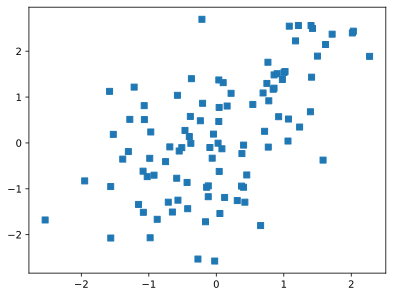

In [ ]:
# create data

N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)/0.90

# and plot
plt.plot(x,y,'s')
plt.show()


In [ ]:
model = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

In [ ]:
learningRate = 0.05
lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
epochs = 400
losses = torch.zeros(epochs)

# train the model
for i in range(epochs):
  # forward pass
  y_pred = model(x)

  # calculate loss
  loss = lossfun(y_pred, y)
  losses[i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
predictions = model(x)
testloss = (predictions-y).pow(2).mean()

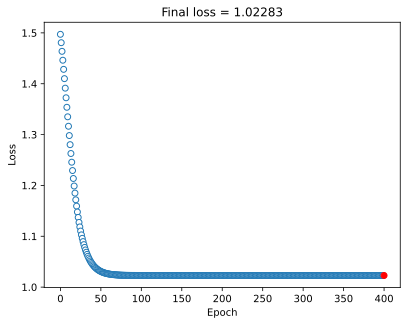

In [ ]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(epochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = np.sqrt(mean_squared_error(y, predictions.detach().numpy()))
r2 = r2_score(y, predictions.detach().numpy())

In [ ]:
print("MSE :" ,mse)
print("R2 Score :", r2)

MSE : 1.0113498795911209
R2 Score : 0.3850277066230774
